# Exploraaaaaaaaaaation #

In [1]:
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np

import json
from ast import literal_eval  # OP = OP, NP = P (by Articuno's Law)

%matplotlib inline

In [2]:
#datapath = 'data/'

## Loading Recipes ##

In [3]:
#filename = 'RAW_recipes.csv'

In [4]:
#df_recipes = pd.read_csv(datapath + filename, index_col='id')

In [5]:
#df_recipes['submitted'] = df_recipes['submitted'].astype('datetime64')

In [6]:
#for col in ['nutrition', 'tags', 'ingredients', 'steps']:
#    df_recipes[col] = df_recipes[col].apply(lambda x: literal_eval(x))

In [7]:
#df_recipes = df_recipes[df_recipes['minutes'] < 300]

## Loading Interactions ##

In [8]:
#filename = 'RAW_interactions.csv'

In [9]:
#df_inter = pd.read_csv(datapath + filename)

In [10]:
#df_inter['date'] = df_inter['date'].astype('datetime64')

## Avg rating, n votes and std ##

In [11]:
#data = [[i, df_sub.shape[0], df_sub.rating.mean(), df_sub.rating.std()] for i, df_sub in df_inter.groupby('recipe_id')]
#df_inter_recipe = pd.DataFrame(data, columns=['recipe_id', 'n_votes', 'avg_rating', 'std_rating'])

In [12]:
#df_inter_recipe = df_inter_recipe.set_index('recipe_id')

In [13]:
#df_inter_recipe

In [14]:
#df = df_recipes.join(df_inter_recipe)
#df.std_rating = df.std_rating.fillna(0)

In [15]:
#df

In [16]:
#df.describe()

In [17]:
#plot = sns.pairplot(df[['minutes', 'n_steps', 'n_ingredients', 'n_votes', 'avg_rating', 'std_rating']])
#plot.savefig('imgs/pairplot_recipes.png')

In [18]:
#with open('data/recipes.json', 'w') as f:
#    df.to_json(f, date_format='')

In [7]:
df = pd.read_json('data/recipes.json')

In [8]:
df.submitted = df.submitted.astype('datetime64')

## Things we don't want

In [9]:
# Recipes which take more than 5 hours
df = df[df['minutes'] < 300]

In [10]:
# We don't want oven or dessert recipes
index = df.tags.to_numpy()
f = lambda x: ('desserts' not in x and 'oven' not in x)
index = [f(x) for x in index]
df = df[index]

In [11]:
df

name  minutes  contributor_id  \
137739  arriba   baked winter squash mexican style       55           47892   
112140                   all in the kitchen  chili      130          196586   
44061           amish  tomato ketchup  for canning      190           41706   
5289                       apple a day  milk shake        0            1533   
25274                        aww  marinated olives       15           21730   
...                                            ...      ...             ...   
357451                                zydeco sauce       15          461283   
188810                          zydeco shrimp wrap       57           37779   
486161                                 zydeco soup       60          227978   
493372                            zydeco spice mix        5         1500678   
308080                   zydeco ya ya deviled eggs       40           37779   

        submitted                                               tags  \
137739 2005-09-16  [60-minutes-or-less, time-to-make, course, mai...   
112140 2005-02-25  [time-to-make, course, preparation, main-dish,...   
44061  2002-10-25  [weeknight, time-to-make, course, main-ingredi...   
5289   1999-12-06  [15-minutes-or-less, time-to-make, course, mai...   
25274  2002-04-14  [15-minutes-or-less, time-to-make, course, mai...   
...           ...                                                ...   
357451 2009-02-23  [15-minutes-or-less, time-to-make, course, cui...   
188810 2006-10-03  [60-minutes-or-less, time-to-make, course, mai...   
486161 2012-08-29  [ham, 60-minutes-or-less, time-to-make, course...   
493372 2013-01-09  [15-minutes-or-less, time-to-make, course, pre...   
308080 2008-06-07  [60-minutes-or-less, time-to-make, course, mai...   

                                          nutrition  n_steps  \
137739        [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
112140   [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
44061     [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   
5289       [160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]        4   
25274      [380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]        4   
...                                             ...      ...   
357451    [239.9, 30.0, 19.0, 22.0, 1.0, 14.0, 5.0]        3   
188810   [482.6, 13.0, 25.0, 37.0, 33.0, 9.0, 27.0]       14   
486161  [415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]        7   
493372        [14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]        1   
308080         [59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]        7   

                                                    steps  \
137739  [make a choice and proceed with recipe, depend...   
112140  [brown ground beef in large pot, add chopped o...   
44061   [mix all ingredients& boil for 2 1 / 2 hours ,...   
5289    [combine ingredients in blender, cover and ble...   
25274   [toast the fennel seeds and lightly crush them...   
...                                                   ...   
357451  [to make the sauce , combine the mayonnaise , ...   
188810  [bring 3 quarts salted to water to a boil, add...   
486161  [heat oil in a 4-quart dutch oven, add celery ...   
493372          [mix all ingredients together thoroughly]   
308080  [in a bowl , combine the mashed yolks and mayo...   

                                              description  \
137739  autumn is my favorite time of year to cook! th...   
112140  this modified version of 'mom's' chili was a h...   
44061   my dh's amish mother raised him on this recipe...   
5289                                                 None   
25274   my italian mil was thoroughly impressed by my ...   
...                                                   ...   
357451  great sauce for cheeseburgers or dipping fries...   
188810             a wrap inspired by great cajun flavors   
486161  this is a delicious soup that i originally fou...   
493372    this spice mix will make your taste buds dance!   
308080                          deviled eggs, cajun-style  

## Tag Analysis ##

In [12]:
df['tag_n'] = df['tags'].apply(lambda x:len(x))

Text(0, 0.5, 'Average number of tags per recipe')

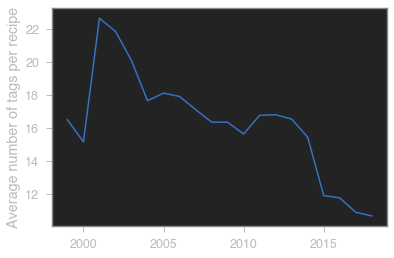

In [23]:
lo = df.copy()
lo['submitted'] = lo['submitted'].apply(lambda x:x.year)
lo = lo.groupby('submitted').mean()
plt.plot(lo.index, lo['tag_n'])
plt.ylabel('Average number of tags per recipe')

In [24]:
df['tags'].to_numpy()[:2]

array([list(['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']),
       list(['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less'])],
      dtype=object)

In [25]:
df.tags

137739    [60-minutes-or-less, time-to-make, course, mai...
112140    [time-to-make, course, preparation, main-dish,...
44061     [weeknight, time-to-make, course, main-ingredi...
5289      [15-minutes-or-less, time-to-make, course, mai...
25274     [15-minutes-or-less, time-to-make, course, mai...
                                ...                        
357451    [15-minutes-or-less, time-to-make, course, cui...
188810    [60-minutes-or-less, time-to-make, course, mai...
486161    [ham, 60-minutes-or-less, time-to-make, course...
493372    [15-minutes-or-less, time-to-make, course, pre...
308080    [60-minutes-or-less, time-to-make, course, mai...
Name: tags, Length: 156948, dtype: object

In [26]:
tags = [j for i in df.tags for j in i]

In [27]:
tags_dict = Counter(tags)

In [28]:
tags_dict.most_common(50)

[('preparation', 156536),
 ('time-to-make', 155473),
 ('course', 145054),
 ('main-ingredient', 118171),
 ('dietary', 110524),
 ('easy', 89755),
 ('occasion', 71146),
 ('cuisine', 64027),
 ('low-in-something', 60895),
 ('main-dish', 54364),
 ('60-minutes-or-less', 45526),
 ('vegetables', 43101),
 ('30-minutes-or-less', 42586),
 ('meat', 41465),
 ('15-minutes-or-less', 36761),
 ('3-steps-or-less', 36736),
 ('number-of-servings', 36234),
 ('low-carb', 34551),
 ('north-american', 31020),
 ('taste-mood', 30586),
 ('4-hours-or-less', 29923),
 ('low-calorie', 29889),
 ('healthy', 29765),
 ('equipment', 29578),
 ('low-cholesterol', 29333),
 ('low-sodium', 28768),
 ('vegetarian', 26143),
 ('low-saturated-fat', 25303),
 ('5-ingredients-or-less', 24590),
 ('beginner-cook', 24435),
 ('dinner-party', 23657),
 ('inexpensive', 22752),
 ('low-protein', 22502),
 ('side-dishes', 21891),
 ('healthy-2', 21617),
 ('pasta-rice-and-grains', 21076),
 ('for-1-or-2', 20102),
 ('american', 19290),
 ('poultry', 1

In [29]:
tags_dict.get('north-american')  # Biased towards low quality food

31020

In [30]:
# We will create dummies for these tags. For some of them, we are interested in True values, for others, in False
# healthy and healthy-2 will be combined
custom_tags = ['vegetarian', 'healthy', 'healthy-2', 'italian', 'beginner-cook', 'inexpensive', 'european']

In [31]:
df_tag = df.copy()[['submitted', 'tags', 'n_votes', 'avg_rating', 'std_rating']]

In [32]:
d_tags = df.tags.to_numpy()

for tag in custom_tags:
    dummy = np.array([tag in tags for i, tags in enumerate(d_tags)]).astype(int)
    df_tag[tag] = dummy

In [33]:
df_tag.healthy = df_tag.healthy.combine(df_tag['healthy-2'], func=max)
df_tag = df_tag.drop(columns='healthy-2')

In [34]:
df_tag = df_tag.drop(columns='tags')

In [35]:
df_tag

submitted  n_votes  avg_rating  std_rating  vegetarian  healthy  \
137739 2005-09-16        3         5.0         0.0           1        0   
112140 2005-02-25        1         4.0         0.0           0        0   
44061  2002-10-25        1         5.0         0.0           1        0   
5289   1999-12-06        2         5.0         0.0           0        0   
25274  2002-04-14        1         2.0         0.0           1        0   
...           ...      ...         ...         ...         ...      ...   
357451 2009-02-23        2         5.0         0.0           0        0   
188810 2006-10-03        1         3.0         0.0           0        1   
486161 2012-08-29        6         5.0         0.0           0        0   
493372 2013-01-09        1         5.0         0.0           1        0   
308080 2008-06-07        5         5.0         0.0           0        0   

        italian  beginner-cook  inexpensive  european  
137739        0              0            0         0  
112140        0              0            0         0  
44061         0              0            0         0  
5289          0              0            0         0  
25274         0              0            0         0  
...         ...            ...          ...       ...  
357451        0              1            1         0  
188810        0              0            0         0  
486161        0              0            0         0  
493372        0              0            0         0  
308080        0              0            0         0  

[156948 rows x 10 columns]

In [36]:
# Change dates to just represent the month
df_tag.submitted = df_tag.submitted.astype('datetime64[M]')

In [37]:
df_tag = df_tag[(df_tag['vegetarian']== 1)  | (df_tag['italian']== 1)  | (df_tag['healthy']== 1)  | (df_tag['beginner-cook'] == 1)  | (df_tag['inexpensive'] == 1)  | (df_tag['european']== 1)]

In [38]:
tags = ['vegetarian', 'italian',  'healthy', 'beginner-cook', 'inexpensive', 'european']

data = {tag: df_tag[df_tag[tag] == 1].submitted.value_counts() for tag in tags}
for k,v in data.items():
    data[k] = v.sort_index()

In [39]:
def sumseries(x, y):
    if np.isnan(x):
        return y
    elif np.isnan(y):
        return x
    else:
        return x+y

In [40]:
total = data['vegetarian']
for i, ele in enumerate(data):
    if i > 0:
        total = total.combine(data[ele], func=sumseries)

In [41]:
for tag, dic in data.items():
    data[tag] = pd.Series({k:v/total[k] for k, v in data[tag].items()})

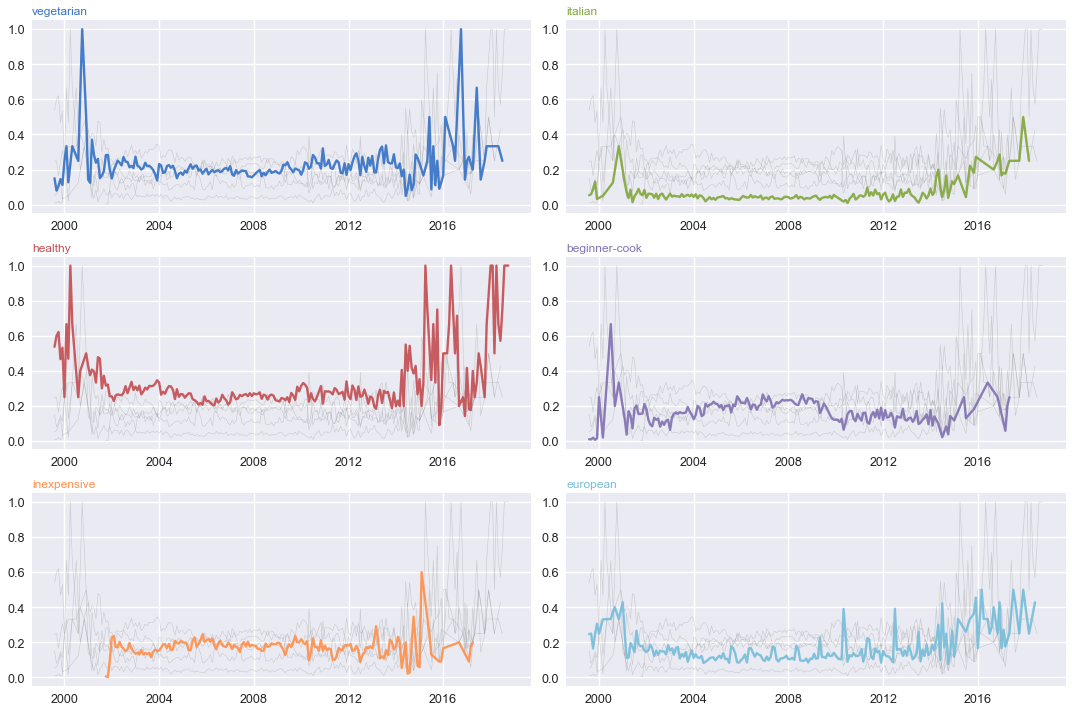

In [42]:
plt.style.use('seaborn-darkgrid')

palette = plt.get_cmap('Set1')
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for i, ele in enumerate(data):
    j = i // 2
    k = i % 2
    for entry in data.keys():
        ax[j][k].plot(data[entry].index, data[entry].to_numpy(), marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data[ele].index, data[ele].to_numpy(), marker = '', color='C{}'.format(i), lw = 2.4, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=12, fontweight=0, color='C{}'.format(i))

fig.tight_layout()
#fig.savefig('imgs/tags.png')
plt.show()


### Tags Yearly ###

In [43]:
df_tag2 = df_tag.copy()
df_tag2.submitted = df_tag2.submitted.astype('datetime64[Y]')

In [44]:
data2 = {tag: df_tag2[df_tag2[tag] == 1].submitted.value_counts() for tag in tags}
for k,v in data2.items():
    data2[k] = v.sort_index()

In [45]:
#total = data2['vegetarian']
#for i, ele in enumerate(data2):
#    if i > 0:
#        total = total.combine(data2[ele], func=sumseries)

In [46]:
# Get number of monthly recipes
df_year = df.copy()
df_year.submitted = df_year.submitted.astype('datetime64[Y]')

In [47]:
total_dict = {k: v.shape[0] for k, v in df_year.groupby('submitted')}
total = pd.Series(total_dict)

In [48]:
data2

{'vegetarian': 1999-01-01      60
 2000-01-01      32
 2001-01-01     470
 2002-01-01    2122
 2003-01-01    1638
 2004-01-01    1492
 2005-01-01    2934
 2006-01-01    3401
 2007-01-01    3739
 2008-01-01    3338
 2009-01-01    2857
 2010-01-01    1615
 2011-01-01    1050
 2012-01-01     679
 2013-01-01     579
 2014-01-01      98
 2015-01-01      14
 2016-01-01       7
 2017-01-01      16
 2018-01-01       2
 Name: submitted, dtype: int64,
 'italian': 1999-01-01     40
 2000-01-01     12
 2001-01-01    136
 2002-01-01    476
 2003-01-01    396
 2004-01-01    297
 2005-01-01    529
 2006-01-01    772
 2007-01-01    785
 2008-01-01    728
 2009-01-01    591
 2010-01-01    228
 2011-01-01    313
 2012-01-01    134
 2013-01-01     99
 2014-01-01     44
 2015-01-01     11
 2016-01-01      4
 2017-01-01     10
 2018-01-01      1
 Name: submitted, dtype: int64,
 'healthy': 1999-01-01     271
 2000-01-01     103
 2001-01-01     675
 2002-01-01    2580
 2003-01-01    2330
 2004-01-01    2119


In [49]:
for tag, dic in data2.items():
    data2[tag] = pd.Series({k:v/total[k] for k, v in data2[tag].items()})

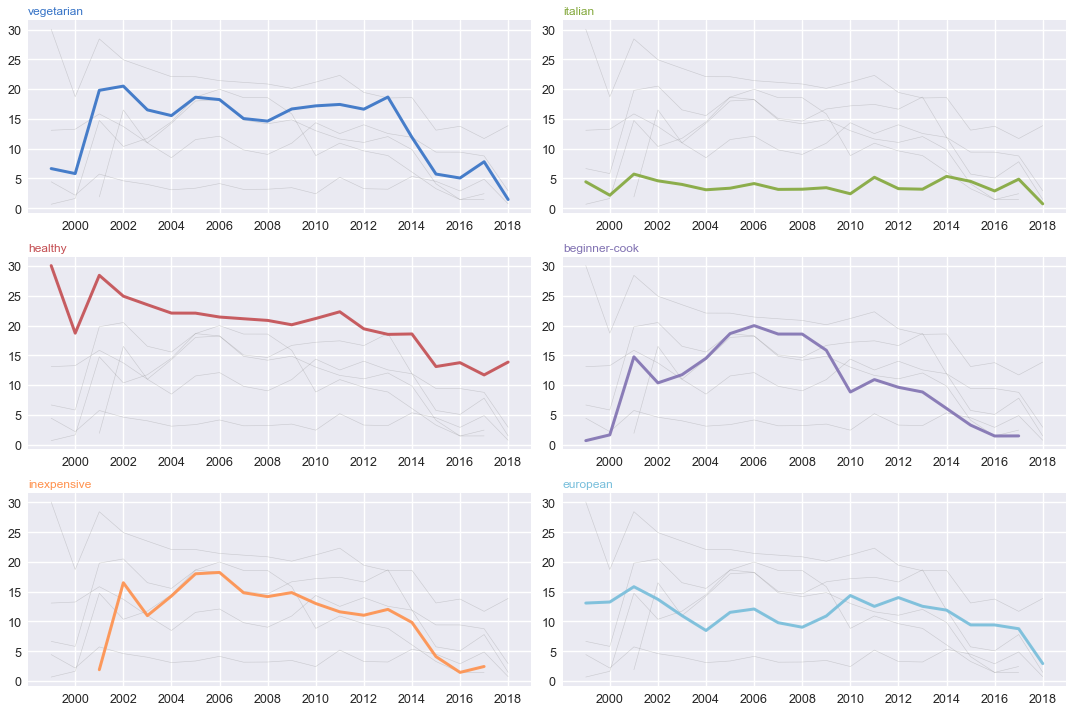

In [51]:
plt.style.use('seaborn-darkgrid')
#palette = plt.get_cmap('Accent')
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for i, ele in enumerate(data2):
    j = i // 2
    k = i % 2
    for entry in data2.keys():
        ax[j][k].plot(data2[entry].index, data2[entry].to_numpy()*100, marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data2[ele].index, data2[ele].to_numpy()*100, marker = '', color='C{}'.format(i), lw = 3, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=12, fontweight=0, color='C{}'.format(i))


fig.tight_layout()
fig.savefig('imgs/tags_yearly.png')
plt.show()


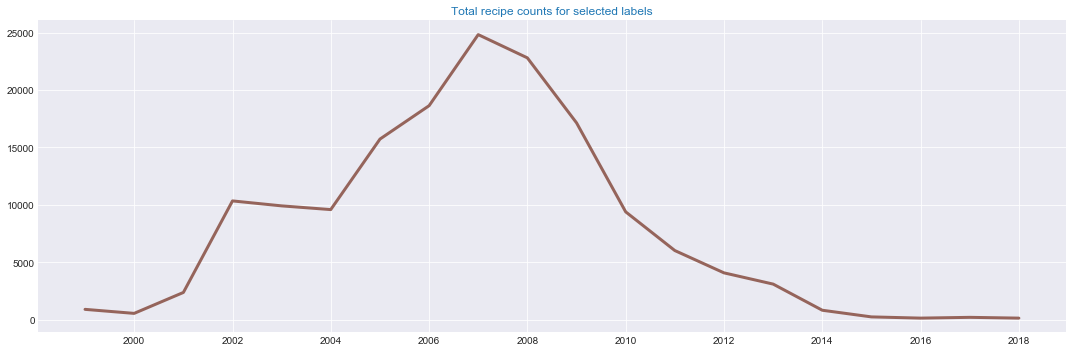

In [51]:
# Plotting yearly total

plt.style.use('seaborn-darkgrid')

#palette = plt.get_cmap('Accent')
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(total.index, total.to_numpy(), marker = '', color='C{}'.format(i), lw = 3, alpha = 0.9)
ax.set_title('Total recipe counts for selected labels', fontsize=12, fontweight=0, color='C0')

fig.tight_layout()
fig.savefig('imgs/tags_yearly_total.png')
plt.show()

## Ingredients (vegetarian and healthy)##

In [53]:
index = (df_tag[(df_tag.vegetarian == 1) & (df_tag.healthy == 1)]).index
df_ing = df.loc[index]
df_ing

name  minutes  \
81185                     mock a mole   low fat guacamole       15   
30300                       munch without guilt  tomatoes       10   
112959                     sour cream  avocado dip  vegan       10   
63793    tide me over   indian chaat  simple veggie salad        2   
120297              middle eastern   twice baked potatoes      110   
...                                                   ...      ...   
97323                     zucchini  peppers  and tomatoes       40   
142932                 zucchini  pignoli and raisin salad       10   
413205  zucchini  courgettes sauteed with sun dried to...       40   
455000                                       zulu cabbage       40   
196201                   zurie s overnight no knead bread       70   

        contributor_id  submitted  \
81185            67026 2004-01-15   
30300             6164 2002-06-04   
112959          167849 2005-03-08   
63793            12657 2003-06-05   
120297          197023 2005-05-02   
...                ...        ...   
97323            19166 2004-08-08   
142932           47892 2005-10-27   
413205          485109 2010-02-16   
455000         1058097 2011-05-04   
196201          200862 2006-11-18   

                                                     tags  \
81185   [15-minutes-or-less, time-to-make, course, mai...   
30300   [15-minutes-or-less, time-to-make, course, mai...   
112959  [lactose, 15-minutes-or-less, time-to-make, co...   
63793   [15-minutes-or-less, time-to-make, course, mai...   
120297  [time-to-make, course, main-ingredient, cuisin...   
...                                                   ...   
97323   [60-minutes-or-less, time-to-make, course, mai...   
142932  [15-minutes-or-less, time-to-make, course, mai...   
413205  [weeknight, 60-minutes-or-less, time-to-make, ...   
455000  [60-minutes-or-less, time-to-make, course, mai...   
196201  [time-to-make, course, main-ingredient, prepar...   

                                          nutrition  n_steps  \
81185       [115.9, 7.0, 21.0, 19.0, 9.0, 3.0, 5.0]        7   
30300           [3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]        3   
112959         [12.8, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]        6   
63793         [73.1, 1.0, 15.0, 0.0, 5.0, 3.0, 4.0]        4   
120297   [327.6, 11.0, 16.0, 14.0, 21.0, 6.0, 18.0]       14   
...                                             ...      ...   
97323      [135.8, 14.0, 28.0, 2.0, 5.0, 21.0, 3.0]        8   
142932     [251.8, 31.0, 48.0, 0.0, 7.0, 11.0, 5.0]        8   
413205       [115.4, 7.0, 33.0, 6.0, 8.0, 3.0, 5.0]       12   
455000        [94.0, 7.0, 25.0, 4.0, 4.0, 3.0, 4.0]        5   
196201  [1379.6, 5.0, 12.0, 194.0, 79.0, 3.0, 96.0]       82   

                                                    steps  \
81185   [thaw peas by running hot water over them in a...   
30300   [put a slice of tomato on each biscuit / crack...   
112959  [peel and pit avocado , put in a large mixing ...   
63793   [toss everything well in a serving bowl, grab ...   
120297  [preheat the oven to 200c, wash the potatoes t...   
...                                                   ...   
97323   [wash , trim , and slice zucchini, salt zucchi...   
142932  [cut the zucchini into narrow strips, add to t...   
413205  [place the sundried tomatoes in the 3 / 4 cup ...   
455000  [heat the oil in a large skillet, add onion an...   
196201  [since first making this bread according to th...   

                                              description  \
81185                        from crescent dragonwagon's    
30300   anytime munchies...another sweat free preparat...   
112959  i made this up when i had an avocado that was ...   
63793   this version of the famous indian chaat (prono...   
120297  a delicious yet low-fat twice-baked potato sid...   
...                                                   ...   
97323   this is a really quick, simple, and flavorful ...   
142932  from diane seed's mediterranean dish

In [54]:
ingredients = [j for i in df_ing.ingredients for j in i]

In [55]:
ingredients_dict = Counter(ingredients)

In [56]:
ingredients_dict.most_common(50)

[('salt', 3406),
 ('olive oil', 2086),
 ('water', 1830),
 ('onion', 1449),
 ('garlic cloves', 1331),
 ('sugar', 1217),
 ('tomatoes', 907),
 ('garlic', 818),
 ('salt and pepper', 704),
 ('lemon juice', 690),
 ('pepper', 583),
 ('extra virgin olive oil', 564),
 ('butter', 554),
 ('garlic clove', 544),
 ('black pepper', 532),
 ('vegetable oil', 493),
 ('honey', 456),
 ('ground cumin', 449),
 ('carrots', 437),
 ('red onion', 436),
 ('oil', 410),
 ('zucchini', 404),
 ('carrot', 399),
 ('fresh cilantro', 395),
 ('onions', 390),
 ('parmesan cheese', 363),
 ('cinnamon', 363),
 ('fresh parsley', 363),
 ('potatoes', 355),
 ('brown sugar', 352),
 ('flour', 346),
 ('milk', 344),
 ('cumin', 325),
 ('baking powder', 321),
 ('fresh lemon juice', 311),
 ('soy sauce', 304),
 ('chili powder', 304),
 ('cilantro', 303),
 ('celery', 303),
 ('fresh ground black pepper', 296),
 ('black beans', 291),
 ('red bell pepper', 291),
 ('chickpeas', 277),
 ('parsley', 275),
 ('orange juice', 270),
 ('cayenne pepper',

In [57]:
# We will use not = to filter, but contains, so that garlic cloves and garlic clove are grouped, and so on...
ing_custom = ['onion', 'garlic', 'tomato', 'cheese', 'egg', 'carrot']

In [58]:
d_ings = df_ing.ingredients.to_numpy()

for ing in ing_custom:
    dummy = np.array([np.array([ing in ingr for ingr in ings]).any() for ings in d_ings]).astype(int)
    df_ing[ing] = dummy

In [59]:
df_ing.submitted = df_ing.submitted.astype('datetime64[Y]')

In [60]:
data = {ing: df_ing[df_ing[ing] == 1].submitted.value_counts() for ing in ing_custom}
for k,v in data.items():
    data[k] = v.sort_index()

In [61]:
for ing, dic in data.items():
    data[ing] = pd.Series({k:v/total[k] for k, v in data[ing].items()})

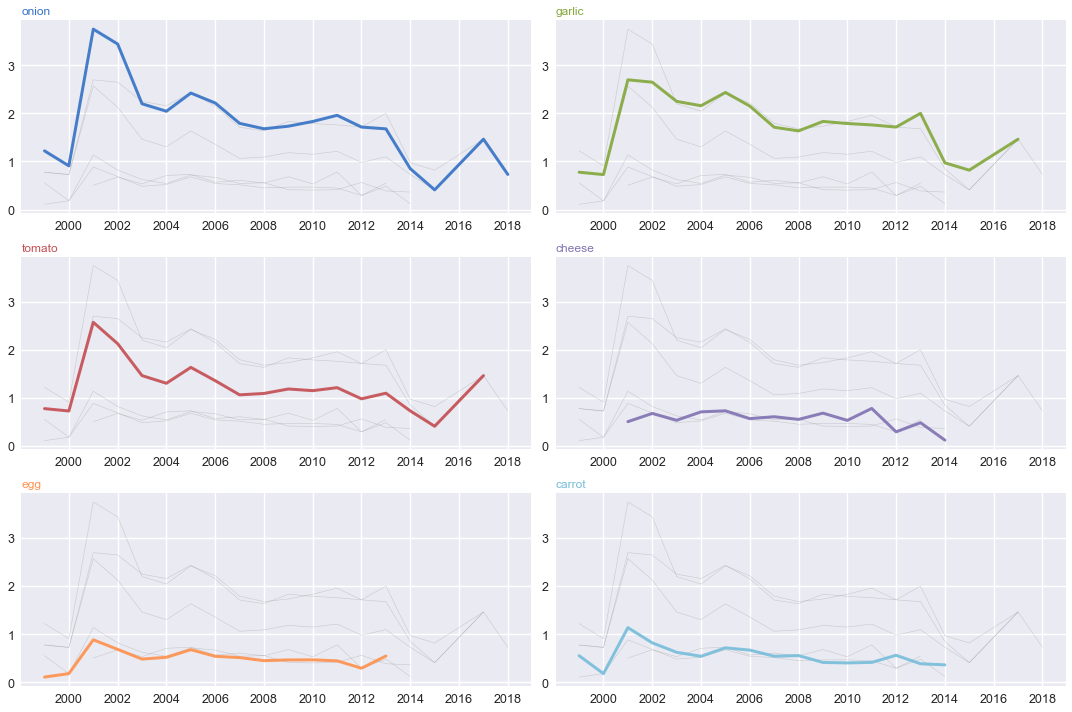

In [62]:
plt.style.use('seaborn-darkgrid')

#palette = plt.get_cmap('Accent')
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for i, ele in enumerate(data):
    j = i // 2
    k = i % 2
    for entry in data.keys():
        ax[j][k].plot(data[entry].index, data[entry].to_numpy()*100, marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data[ele].index, data[ele].to_numpy()*100, marker = '', color='C{}'.format(i), lw = 3, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=12, fontweight=0, color='C{}'.format(i))

fig.tight_layout()
fig.savefig('imgs/ing_yearly.png')
plt.show()


In [62]:
for i in df_ing.ingredients:
    print(i)
df_ing

['frozen peas', 'hass avocado', 'salt', 'lemons, juice of', 'tomatoes', 'onion', 'cilantro']
['tomatoes', 'crackers', 'mayonnaise', 'black pepper']
['soft silken tofu', 'avocado', 'chunky salsa', 'fresh cilantro', 'lime juice', 'hot sauce', 'salt and pepper']
['cucumber', 'potato', 'chopped tomato', 'plain yogurt', 'chat masala', 'paprika', 'salt']
['baking potatoes', 'olive oil', 'chickpeas', 'coriander', 'ground cumin', 'fresh coriander', 'garlic cloves', 'low-fat yogurt', 'tahini', 'salt & freshly ground black pepper']
['rice vinegar', 'maple syrup', 'soy sauce', 'sesame oil', 'gingerroot', 'green cabbage', 'red cabbage', 'carrot', 'green onion', 'apple']
['ghee', 'kidney beans', 'onion', 'garlic clove', 'carrot', 'potatoes', 'garam masala', 'curry powder', 'tabasco sauce', 'salt and pepper', 'water']
['black beans', 'oil', 'frozen corn', 'garlic', 'onion', 'cumin', 'green chili sauce', 'salsa', 'chili powder', 'flour', 'dry breadcrumbs']
['plain tomato juice', 'old bay seasoning']


['cucumbers', 'tomatoes', 'onion', 'green pepper', 'black olives', 'red wine vinegar', 'paprika', 'olive oil', 'garlic cloves', 'salt and pepper']
['water', 'bulgur', 'unsweetened applesauce', 'smart balance light butter spread', 'honey']
['bulgar wheat', 'water', 'salt', 'ground cinnamon', 'black beans', 'orange juice', 'lemon juice', 'brown sugar', 'fresh mint leaves', 'almonds', 'fresh strawberries', 'fresh blueberries', 'mango']
['olive oil', 'fresh lemon juice', 'fresh flat-leaf parsley', 'plain low-fat yogurt', 'lemon zest', 'salt', 'harissa', 'chickpeas', 'bulgur', 'cucumbers', 'radishes', 'scallion top']
['broccoli floret', 'onion', 'green bell peppers', 'garlic', 'olive oil', 'canned tomato', 'bulgur', 'canned black beans', 'dried oregano', 'salt', 'pepper', 'hot water']
['olive oil', 'cinnamon sticks', 'onion', 'pumpkin', 'bulgar wheat', 'salt', 'water']
['water', 'bulgur', 'salt', 'chickpeas', 'plum tomato', 'garlic clove', 'feta cheese', 'green onion', 'of fresh mint', 'fre

['cocoa powder', 'sugar', 'hot water', 'milk']
['dry lentils', 'salt', 'water', 'tomatoes', 'chili powder', 'cumin', 'oregano', 'onion', 'celery', 'garlic']
['dried brown lentils', 'onion', 'oil', 'tomatoes', 'cumin', 'garlic salt', 'paprika', 'onion powder', 'cayenne pepper', 'water']
['frozen raspberries', 'frozen strawberries', 'pineapple', 'diet sprite']
['diced tomatoes', 'tomato paste', 'fresh broccoli florets', 'carrot', 'onion', 'zucchini', 'green bell pepper', 'red bell pepper', 'garlic', 'bay leaves', 'olive oil', 'dried basil', 'dried rosemary', 'dried oregano', 'dried thyme', 'salt', 'ground black pepper', 'white sugar', 'water']
['swiss chard', 'banana', 'kiwi', 'apple', 'orange juice']
['olive oil', 'onion', 'garlic cloves', 'tomato sauce', 'salt', 'thyme', 'red pepper flakes', 'fresh basil leaf', 'mozzarella cheese', 'monterey jack cheese', 'cheddar cheese', 'parmesan cheese', 'pasta']
['water', 'plain yogurt', 'instant mashed potatoes', 'brown sugar', 'salt', 'caraway s

['kale', 'olive oil', 'garlic cloves', 'low sodium vegetable broth', 'low-sodium hot sauce', 'black pepper', 'cayenne pepper', 'fresh lemon juice']
['water', 'green beans', 'olive oil', 'butter', 'garlic clove', 'fresh lemon juice', 'salt', 'fresh ground black pepper', 'fresh parsley']
['onion', 'toasted sesame oil', 'red bell pepper', 'kale', 'water', 'napa cabbage', 'tamari soy sauce', 'white miso', 'tahini', 'lemon juice', 'honey', 'fresh dill weed', 'turmeric']
['leaf lettuce', 'cucumber', 'fresh spinach', 'red radishes', 'light sour cream', 'white vinegar', 'chives', 'fresh ground black pepper']
['yellow squash', 'zucchini', 'onion', 'egg substitute', 'salt', 'black pepper', 'olive oil flavored cooking spray']
['potato', 'onions', 'butter', 'aluminum foil']
['extra firm tofu', 'white miso', 'red miso', 'sake', 'mirin', 'sugar', 'oranges', 'spinach leaves', 'vegetables']
['carrots', 'asparagus spear', 'grapeseed oil', 'grapefruit juice', 'clementines', 'salt', 'cracked pepper', 'fr

['canola oil', 'onion', 'fresh gingerroot', 'garlic', 'coriander powder', 'ground cardamom', 'ground nutmeg', 'red chili powder', 'ground cumin', 'basmati rice', 'salt', 'dry lentils', 'water', 'potato', 'green bell peppers', 'green peas', 'raisins', 'butter']
['canola oil', 'black mustard seeds', 'cumin seed', 'dried red chilies', 'yellow onion', 'garlic cloves', 'green chili pepper', 'potatoes', 'salt', 'ground turmeric', 'ground coriander', 'ground cumin', 'fresh spinach']
['small red potatoes', 'water', 'baby spinach', 'vegetable oil', 'onion', 'garlic cloves', 'fresh ginger', 'jalapenos', 'tomatoes', 'fresh cilantro', 'ground coriander', 'ground cumin', 'paprika', 'garam masala', 'low-fat plain yogurt', 'salt', 'cilantro']
['nonstick cooking spray', 'garlic cloves', 'water', 'apple juice', 'potatoes', 'carrot', 'low sodium soy sauce', 'curry powder', 'gingerroot', 'cardamom', 'cinnamon', 'cauliflower florets', 'zucchini', 'frozen peas', 'golden raisin', 'chutney']
['oil', 'cumin s

['paprika', 'ground black pepper', 'cayenne pepper', 'garlic powder']
['whole wheat linguine', 'asparagus spears', 'zucchini', 'raw cashews', 'onion powder', 'salt', 'soymilk', 'grape tomatoes', 'scallions', 'fresh basil', 'fresh flat-leaf parsley', 'fresh ground black pepper', 'parmesan cheese']
['linguine', 'olive oil', 'garlic cloves', 'zucchini', 'yogurt', 'cheddar cheese', 'salt', 'pepper']
['asparagus', 'flat leaf parsley', 'olive oil', 'garlic cloves', 'lemon rind', 'lemon, juice of', 'chili flakes', 'water', 'linguine']
['linguine', 'salt', 'olive oil', 'butter', 'lemon juice', 'garlic', 'parmesan cheese']
['fresh tomato', 'green bell pepper', 'fresh basil', 'garlic cloves', 'olive oil', 'salt', 'black pepper', 'spinach linguine', 'mozzarella cheese']
['extra virgin olive oil', 'garlic', 'lemon, zest of', 'linguine', 'fresh herbs', 'lemon juice', 'salt']
['linguine', 'fresh mushrooms', 'garlic cloves', 'unsalted butter', 'fresh sage', 'extra virgin olive oil', 'fresh parmesan c

['garlic clove', 'fresh cilantro', 'chickpeas', 'fresh lemon juice', 'olive oil', 'salt', 'hot pepper sauce', 'ground cumin']
['dried garbanzo beans', 'scallions', 'tomatoes', 'cilantro', 'kalamata olives', 'garlic', 'olive oil', 'fresh lemon juice', 'ground cumin', 'black pepper', 'cayenne']
['onion', 'garlic cloves', 'fresh ginger', 'red wine', 'cumin', 'cinnamon', 'paprika', 'crushed red pepper flakes', 'water', 'salt', 'sweet potatoes', 'dried apricot', 'chickpeas', 'raisins', 'lemon juice', 'sliced almonds']
['peanut oil', 'turmeric', 'cinnamon', 'ground ginger', 'cumin', 'cayenne', 'couscous', 'water', 'orange juice', 'brown sugar', 'chickpeas', 'mandarin oranges', 'red onion', 'green bell peppers', 'golden raisin', 'fresh cilantro', 'peanuts', 'salt']
['couscous', 'salt', 'garbanzo beans', 'black pepper', 'black beans', 'allspice', 'diced tomatoes', 'nutmeg', 'green onion', 'parsley', 'red wine', 'yellow onion', 'garlic', 'olive oil', 'baby corn']
['carrot', 'orange juice', 'lem

['chickpeas', 'fresh parsley', 'sweet red peppers', 'red onions', 'garlic cloves', 'olive oil', 'lemon juice', 'salt and pepper']
['olive oil', 'parsnips', 'celery', 'onion', 'instant brown rice', 'water', 'kosher salt', 'dried thyme', 'fresh ground black pepper', 'fat-free chicken broth', 'water chestnuts']
['parsnip', 'olive oil', 'ground cumin', 'fresh thyme']
['new potatoes', 'sour cream']
['potatoes', 'eggs', 'salt', 'ground pepper', 'cumin', 'fresh parsley', 'turmeric', 'garlic cloves', 'onion']
['olive oil', 'onion', 'garlic clove', 'red pepper', 'jalapeno pepper', 'black beans', 'lime', 'tortillas', 'tomatoes', 'salsa', 'hot sauce', 'sour cream', 'cheddar cheese']
['baby spinach leaves', 'vegetable oil', 'yellow onion', 'fresh ginger', 'tomatoes', 'plain yogurt', 'water', 'turmeric', 'cracked black pepper', 'ground cinnamon', 'ground cumin', 'salt', 'jalapenos']
['sugar', 'passion fruit', 'water', 'lemon']
['pecans', 'apple', 'wine', 'cinnamon']
['eggs', 'milk', 'cottage cheese

['eggs', 'pumpkin puree', 'dried sweetened cranberries', 'pumpkin seeds', 'all-purpose flour', 'vegetable oil', 'baking powder', 'granulated sugar', 'salt']
['all-purpose flour', 'brown sugar', 'baking powder', 'pumpkin pie spice', 'salt', 'milk', 'pumpkin puree', 'egg', 'vegetable oil', 'maple syrup', 'ground cinnamon']
['pumpkin puree', 'yogurt', 'soymilk', 'brown sugar', 'ground cinnamon', 'ground ginger', 'ground nutmeg', 'ground cloves', 'ice cubes']
['bread', 'peanut butter', 'canned pumpkin', 'pumpkin pie spice', 'honey']
['pumpkin puree', 'paprika', 'garlic cloves', 'ground cinnamon', 'lemon juice', 'salt', 'vegetable oil']
['unsalted butter', 'sugar', 'egg', 'cooked pumpkin', 'milk', 'self-rising flour']
['water', 'quinoa', 'olive oil', 'jicama', 'red onion', 'frozen whole kernel corn', 'red bell pepper', 'green bell pepper', 'jalapeno peppers', 'chopped tomato', 'green onion', 'unsalted pumpkin seeds', 'fresh cilantro', 'fresh lime juice', 'salt', 'jalapeno']
['pumpkin', 'oni

['tomatillos', 'cilantro', 'garlic', 'white onion', 'lime, juice of', 'serrano peppers']
['potato', 'mayonnaise', 'dill', 'basil', 'parsley', 'lemon, juice and zest of', 'capers', 'cornichons', 'red onion', 'garlic clove']
['tomatillos', 'serrano peppers', 'onion', 'cilantro', 'garlic cloves', 'avocados', 'olive oil', 'salt']
['plain yogurt', 'chunky salsa', 'salsa']
['plum tomatoes', 'garlic', 'red onion', 'fresh cilantro', 'fresh lemon juice', 'salt and pepper']
['avocado', 'salsa', 'italian parsley', 'lime juice']
['frozen french fries', 'fine salt', 'cayenne pepper', 'white vinegar']
['grapefruit juice', 'club soda', 'ice']
['boiling potatoes', 'salt', 'red chili pepper', 'black pepper', 'vegetable oil', 'onion', 'peas', 'ginger', 'green chili pepper', 'fresh cilantro', 'water', 'coriander seed', 'garam masala', 'cumin seed', 'lemon juice']
['mashed potatoes', 'peas', 'turmeric', 'red chili powder', 'coriander seed', 'cumin seeds', 'fennel seed', 'ginger', 'garam masala powder', 'l

['extra virgin olive oil', 'garlic cloves', 'onion', 'hot peppers', 'cannellini beans', 'escarole', 'white wine', 'fresh ground black pepper', 'ditalini', 'romano cheese']
['olive oil', 'onion', 'red bell pepper', 'garlic cloves', 'ground cumin', 'dried oregano', 'rotel tomatoes', 'hominy', 'salt', 'pumpkin', 'sharp cheddar cheese']
['peanut oil', 'garlic cloves', 'red onion', 'red wine vinegar', 'dried chili pepper flakes', 'salt', 'fresh coarse ground black pepper', 'extra virgin olive oil', 'lime, juice of', 'garbanzo beans', 'cilantro leaves', 'red bell pepper', 'green bell pepper']
['garbanzo beans', 'tahini', 'lemon juice', 'water', 'garlic', 'ground cumin', 'cayenne pepper', 'hot chili pepper', 'salt', 'fresh ground black pepper', 'paprika']
['kale', 'leek', 'olive oil', 'onion', 'garlic cloves', 'red bell peppers', 'red pepper flakes', 'salt', 'white pepper']
['ground cumin', 'garlic powder', 'salt', 'ground red pepper', 'olive oil', 'sweet potato', 'cooking spray', 'fresh cila

['sweet potatoes', 'fresh rosemary', 'olive oil', 'salt']
['olive oil', 'chili powder', 'ground coriander', 'salt & freshly ground black pepper', 'sweet potato', 'cassava', 'sour cream', 'sweet chili sauce']
['sweet potato', 'canned black beans', 'onion', 'corn', 'green chilies', 'coriander', 'cumin', 'chili powder', 'garlic cloves', 'green enchilada sauce', 'flour tortillas']
['sweet potatoes', 'olive oil', 'quinoa', 'avocados', 'italian parsley', 'lemon juice', 'garlic cloves', 'sweet paprika', 'red pepper flakes', 'red wine vinegar', 'hot sauce']
['sweet potatoes', 'plain white flour', 'salt', 'dried yeast', 'caraway seeds', 'fresh ground black pepper', 'warm water']
['sweet potato', 'onion', 'black beans', 'whole kernel corn', 'rotel tomatoes & chilies', 'sugar', 'olive oil', 'tortilla']
['canola oil', 'onion', 'carrots', 'green bell pepper', 'red bell pepper', 'garlic', 'sweet potatoes', 'unsalted dry roasted peanuts', 'crushed tomatoes', 'tomato paste', 'green chilies', 'chili po

['sun-dried tomatoes', 'avocados', 'almonds', 'tomatoes', 'carrot', 'cilantro', 'lemon juice', 'chili powder', 'jalapeno pepper', 'cumin', 'salt', 'fresh ground black pepper']
['potato', 'celery', 'onion', 'milk', 'salt and pepper']
['water', 'cornstarch', 'salt', 'fresh ground black pepper', 'shallots', 'sweet red pepper', 'dijon mustard', 'garlic', 'fresh parsley', 'hungarian paprika', 'white vinegar', 'red wine vinegar', 'liquid honey']
['potatoes', 'spices', 'vegetable oil']
['extra virgin olive oil', 'onion', 'sweet red pepper', 'green pepper', 'plum tomatoes', 'tomato paste', 'garlic cloves', 'fresh basil', 'dried oregano', 'italian seasoning mix', 'hot red pepper flakes', 'salt', 'black pepper', 'pasta', 'rigatoni pasta', 'bow tie pasta', 'butter', 'cheese']
['water', 'canned tomatoes', 'potatoes', 'carrots', 'onions', 'salt', 'red beets', 'butter', 'whipping cream', 'green cabbage', 'cauliflower florets', 'celery ribs', 'green pepper', 'sweet red pepper', 'fresh ground black pe

['yellow squash', 'fresh snow pea', 'olive oil', 'salt & pepper']
['yellow squash', 'zucchini', 'red bell pepper', 'carrots', 'oil', 'fresh cilantro', 'garlic', 'ginger', 'soy sauce', 'red pepper flakes', 'salt']
['yellow squash', 'olive oil', 'red onion', 'garlic clove', 'salt', 'crushed red pepper flakes', 'fresh ground black pepper', 'fresh parmesan cheese']
['olive oil', 'yellow squash', 'garlic', 'water', 'salt', 'black pepper', 'basil']
['pecans', 'pattypan squash', 'olive oil', 'fresh basil']
['yellow tomatoes', 'light olive oil', 'crushed red pepper flakes', 'fresh basil', 'salt', 'black pepper', 'garlic powder', 'sugar']
['turnips', 'onion', 'long-grain rice', 'water', 'salt', 'salt and pepper']
['pineapple juice', 'orange juice', 'lemon juice', 'ice', 'lemon slice']
['dry lentils', 'oil', 'canned tomatoes', 'onion', 'garlic cloves', 'cumin', 'coriander', 'turmeric', 'salt', 'water', 'green chili pepper', 'black pepper', 'bell pepper']
['garlic cloves', 'onion', 'olive oil', '

name  minutes  \
81185                     mock a mole   low fat guacamole       15   
30300                       munch without guilt  tomatoes       10   
112959                     sour cream  avocado dip  vegan       10   
63793    tide me over   indian chaat  simple veggie salad        2   
120297              middle eastern   twice baked potatoes      110   
...                                                   ...      ...   
97323                     zucchini  peppers  and tomatoes       40   
142932                 zucchini  pignoli and raisin salad       10   
413205  zucchini  courgettes sauteed with sun dried to...       40   
455000                                       zulu cabbage       40   
196201                   zurie s overnight no knead bread       70   

        contributor_id  submitted  \
81185            67026 2004-01-01   
30300             6164 2002-01-01   
112959          167849 2005-01-01   
63793            12657 2003-01-01   
120297          197023 2005-01-01   
...                ...        ...   
97323            19166 2004-01-01   
142932           47892 2005-01-01   
413205          485109 2010-01-01   
455000         1058097 2011-01-01   
196201          200862 2006-01-01   

                                                     tags  \
81185   [15-minutes-or-less, time-to-make, course, mai...   
30300   [15-minutes-or-less, time-to-make, course, mai...   
112959  [lactose, 15-minutes-or-less, time-to-make, co...   
63793   [15-minutes-or-less, time-to-make, course, mai...   
120297  [time-to-make, course, main-ingredient, cuisin...   
...                                                   ...   
97323   [60-minutes-or-less, time-to-make, course, mai...   
142932  [15-minutes-or-less, time-to-make, course, mai...   
413205  [weeknight, 60-minutes-or-less, time-to-make, ...   
455000  [60-minutes-or-less, time-to-make, course, mai...   
196201  [time-to-make, course, main-ingredient, prepar...   

                                          nutrition  n_steps  \
81185       [115.9, 7.0, 21.0, 19.0, 9.0, 3.0, 5.0]        7   
30300           [3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]        3   
112959         [12.8, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]        6   
63793         [73.1, 1.0, 15.0, 0.0, 5.0, 3.0, 4.0]        4   
120297   [327.6, 11.0, 16.0, 14.0, 21.0, 6.0, 18.0]       14   
...                                             ...      ...   
97323      [135.8, 14.0, 28.0, 2.0, 5.0, 21.0, 3.0]        8   
142932     [251.8, 31.0, 48.0, 0.0, 7.0, 11.0, 5.0]        8   
413205       [115.4, 7.0, 33.0, 6.0, 8.0, 3.0, 5.0]       12   
455000        [94.0, 7.0, 25.0, 4.0, 4.0, 3.0, 4.0]        5   
196201  [1379.6, 5.0, 12.0, 194.0, 79.0, 3.0, 96.0]       82   

                                                    steps  \
81185   [thaw peas by running hot water over them in a...   
30300   [put a slice of tomato on each biscuit / crack...   
112959  [peel and pit avocado , put in a large mixing ...   
63793   [toss everything well in a serving bowl, grab ...   
120297  [preheat the oven to 200c, wash the potatoes t...   
...                                                   ...   
97323   [wash , trim , and slice zucchini, salt zucchi...   
142932  [cut the zucchini into narrow strips, add to t...   
413205  [place the sundried tomatoes in the 3 / 4 cup ...   
455000  [heat the oil in a large skillet, add onion an...   
196201  [since first making this bread according to th...   

                                              description  \
81185                        from crescent dragonwagon's    
30300   anytime munchies...another sweat free preparat...   
112959  i made this up when i had an avocado that was ...   
63793   this version of the famous indian chaat (prono...   
120297  a delicious yet low-fat twice-baked potato sid...   
...                                                   ...   
97323   this is a really quick, simple, and flavorful ...   
142932  from diane seed's mediterranean dish

# Ingredients controversy

In [63]:
st_ing = {k:df_ing[df_ing[k]==1]['std_rating'].mean() for k in ing_custom }
rating_ing = {k:df_ing[df_ing[k]==1]['avg_rating'].mean() for k in ing_custom }
n_ing = {k:df_ing[df_ing[k]==1]['n_votes'].mean() for k in ing_custom }

In [64]:
df.shape

(156948, 14)

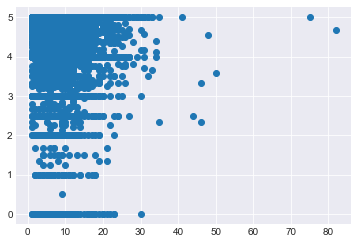

In [65]:
plt.scatter(df_ing['n_steps'], df_ing['avg_rating'])

In [66]:
dlen = []
for i in df['description']:
    if i:
        dlen.append(len(i.split(' ')))
    else:
        dlen.append(0)
df['dlen'] = dlen

In [67]:
dname = []
for i in df['name']:
    if i:
        dname.append(len(i.split(' ')))
    else:
        dname.append(0)
df['dname'] = dname

In [68]:
print('nIngredients:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['n_ingredients'].median())
print('Minutes:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['minutes'].median())
print('nSteps:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['n_steps'].median())
print('Desc length:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['dlen'].median())
print('Name length:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['dname'].median())

nIngredients: 8.0
Minutes: 30.0
nSteps: 8.0
Desc length: 35.0
Name length: 5.0


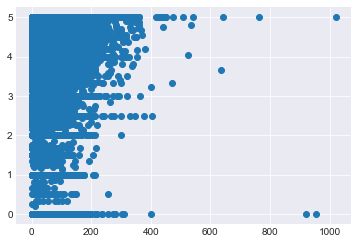

In [69]:
plt.scatter(df['dlen'], df['avg_rating'])

In [70]:
#plt.scatter(df_ing['dlen'], df_ing['avg_rating'])

# Overall name for healthy + vegetarian

In [71]:
irr = ['s', 'with', 'and', 'the', 'for']

In [72]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

def generate_wordcloud(name, series=None, freq=None, irrelevant_words=[], bg='white') -> Counter:
    """Plot wordcloud given series of text.
    
    :param name: name of the figure to save
    :param series: the pd.Series of text
    :param freq: the dictionary of frequencies
    :param irrelevant_words: list of words to exclude
    :param bg: the background color for the cloud
    :return: a collections.Counter of every word
    """
    lo = None
    if series is not None:
        lucastemmer = PorterStemmer()
        text = [lucastemmer.stem(term) for term in word_tokenize(series.str.cat(sep=' '))]
        lo = Counter(text)
        irr = ['s', 'with', 'and']
        lo = {k:v for k,v in lo.items() if k not in irrelevant_words}
    else:
        lo = freq
    
    # Plot
    wordcloud = WordCloud(width = 1920, height = 1080, 
                background_color = bg, 
                stopwords = [' ', '  '], 
                min_font_size = 10).generate_from_frequencies(lo) 

    # plot the WordCloud image
    plt.figure(figsize = (19.2, 10.8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.savefig('imgs/{}.png'.format(name))

    plt.show()
    
    return lo

# Most controversial ingredient (STD per ingredient)

In [73]:
df_con = df.copy()
df_con['ing_text'] = df_con.ingredients.apply(lambda x: ' '.join(['_'.join(ing.split(' ')) for ing in x]))

In [74]:
desc = df_con.std_rating.describe()
desc

count    156948.000000
mean          0.446846
std           0.764981
min           0.000000
25%           0.000000
50%           0.000000
75%           0.577350
max           3.535534
Name: std_rating, dtype: float64

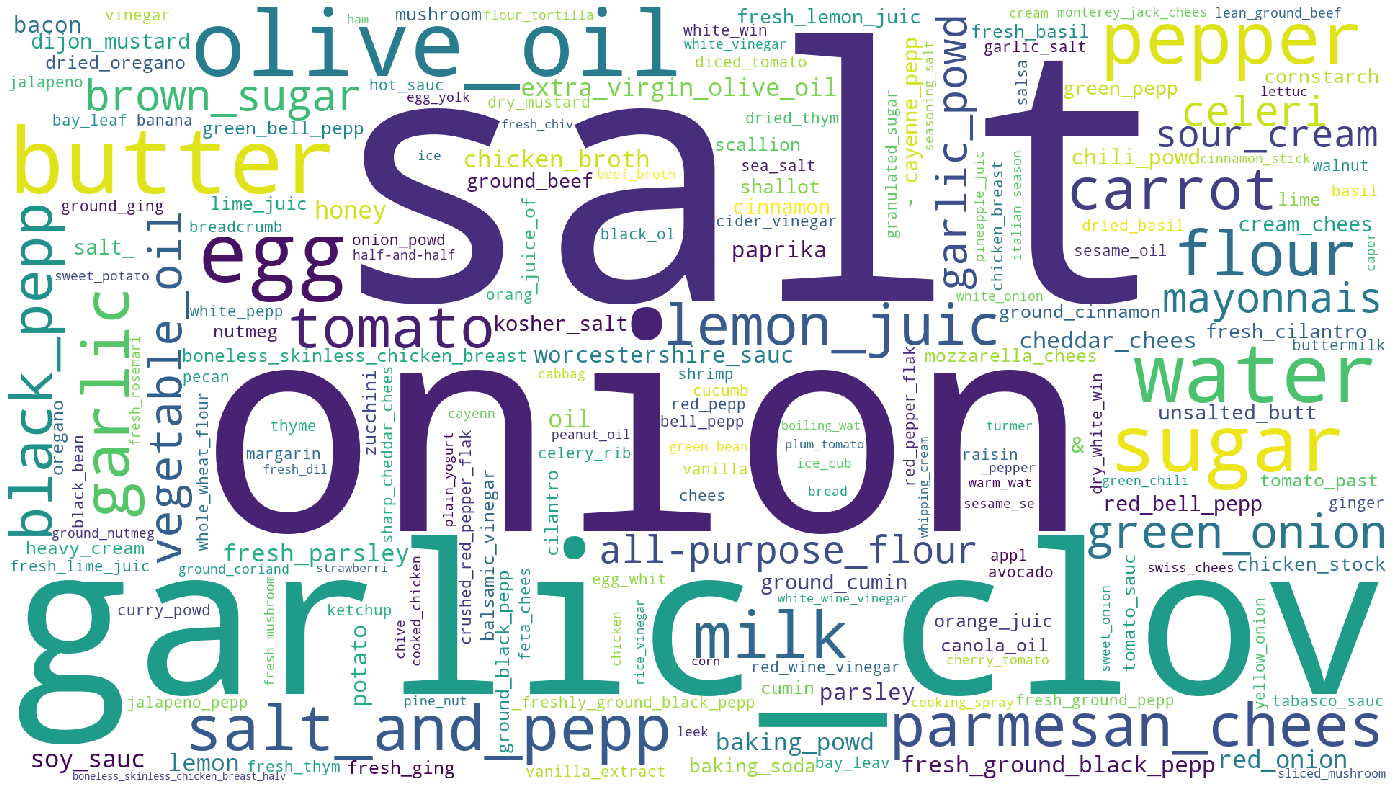

In [75]:
low_size = df_con[df_con.std_rating <= desc['mean']].shape[0]
lo_low = generate_wordcloud('lalala', df_con[df_con.std_rating <= desc['mean']].ing_text, None, irr)

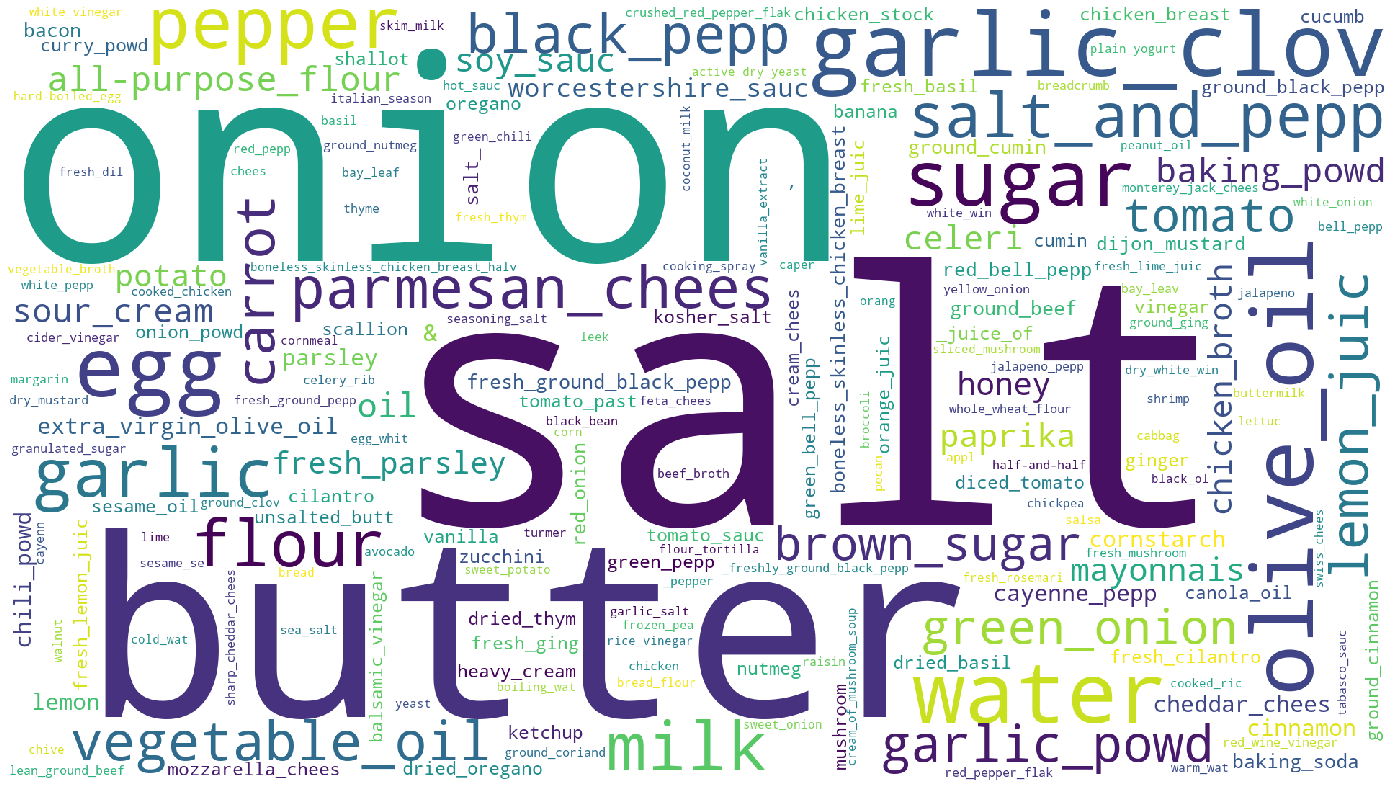

In [76]:
high_size = df_con[df_con.std_rating >= desc['75%']].shape[0]
lo_high = generate_wordcloud('lalala', df_con[df_con.std_rating >= desc['75%']].ing_text, None, irr)

In [77]:
set(list(lo_low.keys()) + list(lo_high.keys()))

{'frozen_light_whipped_dessert_top',
 'worthington_frichik',
 'pickling_salt',
 'pomegranate_powd',
 'quick-cooking_polenta',
 'jello_gelatin',
 'salt_herring_fillet',
 'trout_fillet',
 'deviled_ham',
 "emeril's_kicked_up_horseradish_mustard",
 'marco_polo_noodl',
 'chocolate_fudge_ice_cream',
 'pork_neck',
 'honey_oat_bread',
 'stir-fry_sauc',
 'ham_shank',
 'mandarin_orange_piec',
 'green_pea_soup',
 'pork_leg_steak',
 'hamburger_relish',
 'maple_extract',
 'tomato_juic',
 'assorted_crudit',
 'reduced-sodium_vegetable_broth',
 'nonfat_vanilla_yogurt',
 'szechuan_oil',
 'reduced-fat_beef_broth',
 'tangerine_sherbet',
 'rice-a-roni_broccoli_au_gratin',
 'calvado',
 'low-fat_chocolate_frozen_yogurt',
 'skinless_chicken_breast_halv',
 'coleslaw',
 'plum_juic',
 'mung_bean_noodl',
 'frozen_green_bean',
 'ground_savori',
 'red_sugar_cryst',
 'worthington_wham_vegetable_protein_slic',
 'white_horseradish',
 'rock_lobster_tail',
 'sauterne_white_win',
 'clementine_juic',
 'dulce_de_leche_ice

In [78]:
# Difference between average in high and average in low
lo_diff = {k: - lo_high.get(k, 0)/high_size + lo_low.get(k, 0)/low_size for k in set(list(lo_low.keys()) + list(lo_high.keys()))}

In [79]:
lo_diff = dict(sorted(lo_diff.items(), key=lambda kv: kv[1]))

In [80]:
lo_diff

{'salt': -0.03665620224514138,
 'water': -0.025807490277174633,
 'flour': -0.020347149163066805,
 'onion': -0.01791343298641057,
 'garlic': -0.017699868070250493,
 'egg': -0.01721000065645445,
 'milk': -0.017170294869012434,
 'baking_powd': -0.014739639260688456,
 'butter': -0.01464355968931122,
 'garlic_powd': -0.01275740296077714,
 'sugar': -0.011751956789087803,
 'paprika': -0.010188468347931176,
 'vegetable_oil': -0.00980834704611979,
 'oil': -0.009416929912649148,
 'soy_sauc': -0.009300873975357518,
 'cornstarch': -0.009153335091770121,
 'all-purpose_flour': -0.00801900986542118,
 'boneless_skinless_chicken_breast': -0.006608437612898685,
 'baking_soda': -0.0064322880910563825,
 'parmesan_chees': -0.005914178849269092,
 'chicken_broth': -0.005826856486986928,
 'brown_sugar': -0.005307262366245999,
 'cayenne_pepp': -0.00525338544064646,
 'black_pepp': -0.005205316741261207,
 'cinnamon': -0.004897400221904741,
 'salt_and_pepp': -0.0048450844217477335,
 'potato': -0.00447525596758582

In [81]:
lo_diff2 = dict(sorted(lo_diff.items(), key=lambda kv: kv[1], reverse=True))

In [82]:
lo_diff2

{'garlic_clov': 0.01546793008777897,
 'red_onion': 0.009171897470831504,
 'olive_oil': 0.0087272435824223,
 'tomato': 0.0072356204555045975,
 'extra_virgin_olive_oil': 0.006688940197935547,
 'shallot': 0.0064234803365360756,
 'kosher_salt': 0.00562368593767781,
 'fresh_ground_black_pepp': 0.005477877806553184,
 'avocado': 0.005174375016531271,
 'bacon': 0.004377258025981011,
 'orange_juic': 0.004338997495019484,
 'cream_chees': 0.0041253659702693846,
 'unsalted_butt': 0.0036833751404076152,
 'red_bell_pepp': 0.0035486184666618306,
 'lime': 0.0035060656438915955,
 'strawberri': 0.0033276032404943685,
 'lime_juic': 0.003297507723285825,
 'ice': 0.0032644437332231937,
 'orang': 0.003228692482778151,
 'sea_salt': 0.003115993532753108,
 'cherry_tomato': 0.0030058066475264463,
 'lemon': 0.0029243674728942765,
 'dijon_mustard': 0.002875581071305991,
 'black_ol': 0.0028632254991213333,
 'fresh_cilantro': 0.0028561512813456875,
 'red_wine_vinegar': 0.002740957186389177,
 'walnut': 0.00263376982

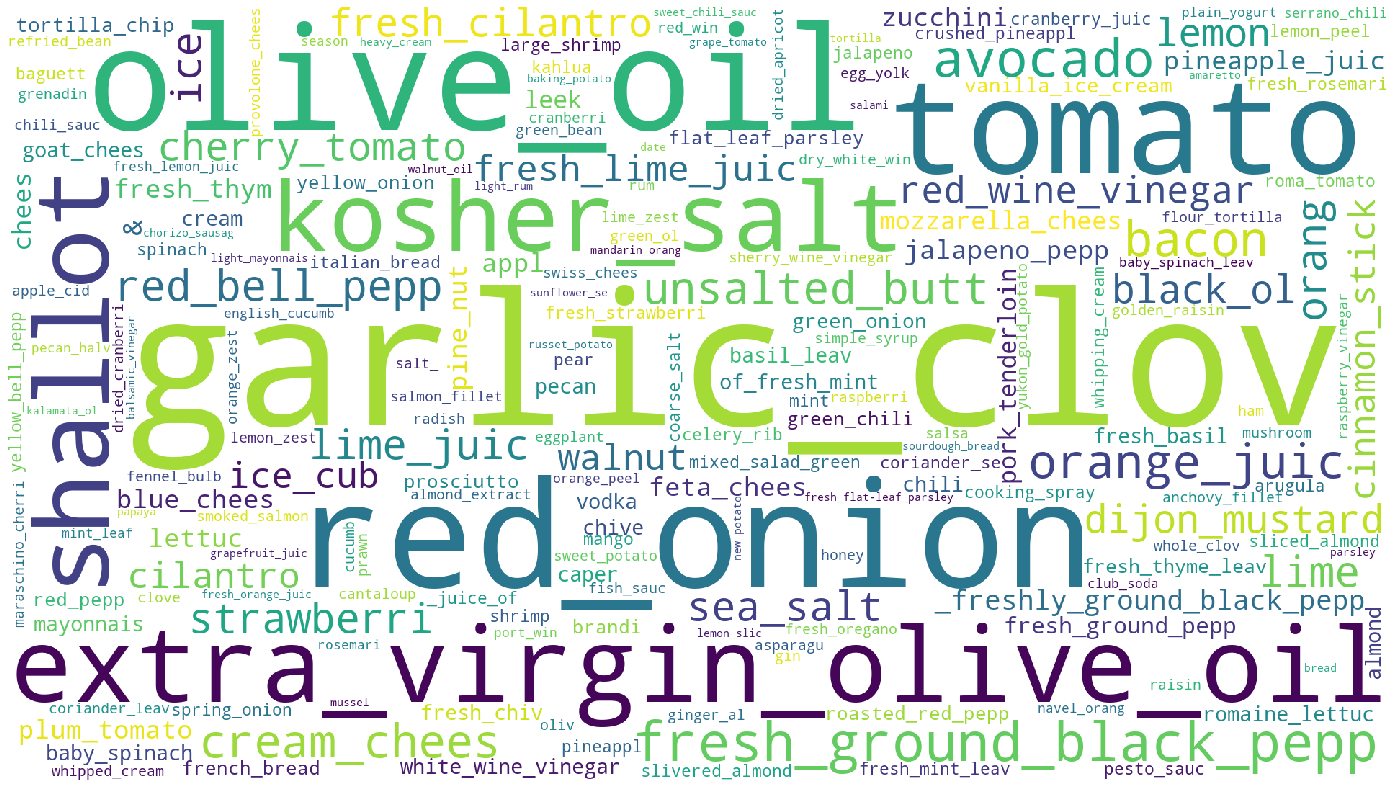

In [83]:
lo_diff_cloud_good = generate_wordcloud('std_low', None, lo_diff2, irr)

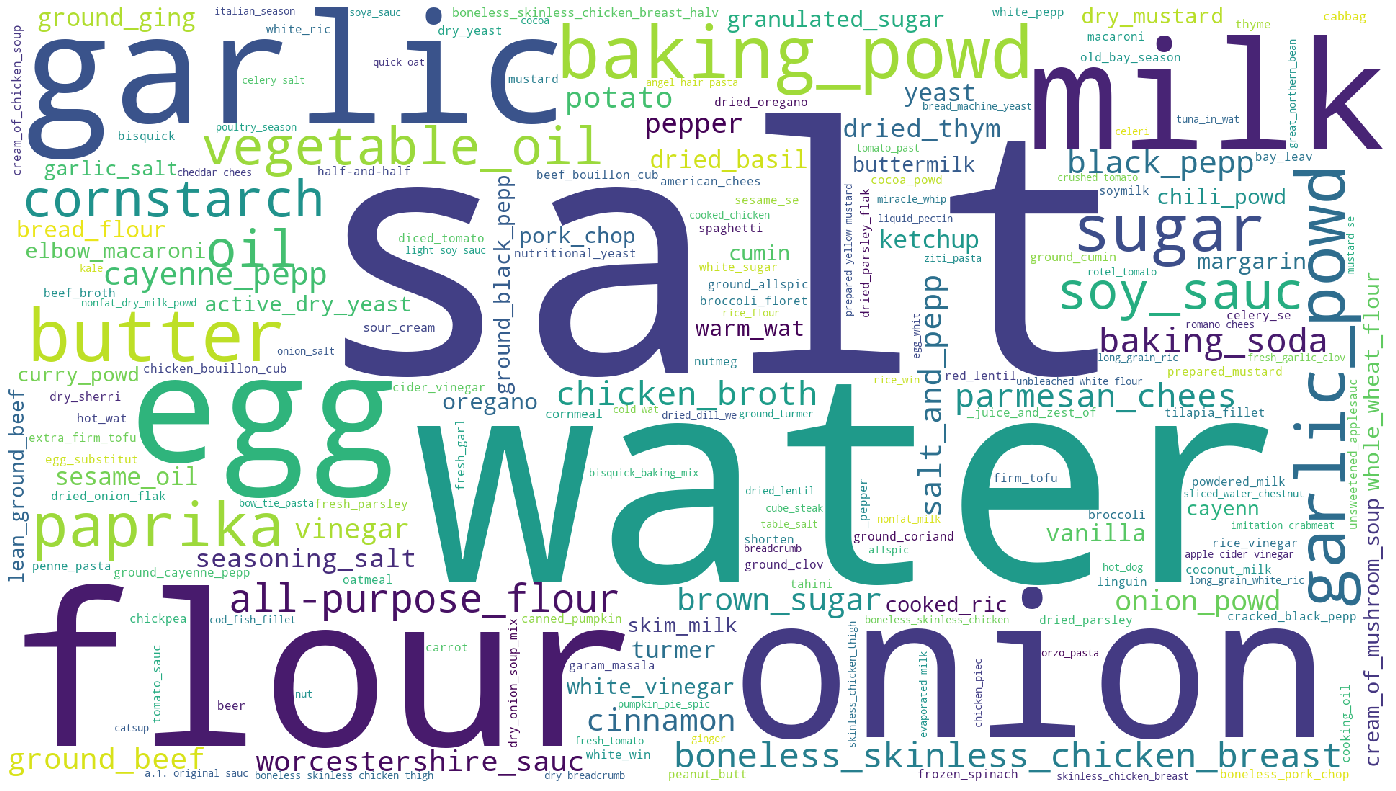

In [84]:
lo_diff_cloud_bad = generate_wordcloud('std_high', None, {k:-v for k, v in lo_diff2.items()}, irr)

# BULLSHIT

In [85]:
index = (df_tag[(df_tag.vegetarian == 1) & (df_tag.inexpensive == 1)]).index
df_interesting = df.loc[index]

In [86]:
tags = [j for i in df_interesting.tags for j in i]

In [87]:
tags_dict = Counter(tags)

In [88]:
tags_dict.most_common(50)

[('preparation', 6157),
 ('vegetarian', 6157),
 ('dietary', 6157),
 ('inexpensive', 6157),
 ('time-to-make', 6133),
 ('course', 6037),
 ('main-ingredient', 5477),
 ('easy', 5112),
 ('occasion', 4474),
 ('cuisine', 3805),
 ('vegetables', 3347),
 ('low-in-something', 2988),
 ('beginner-cook', 2647),
 ('taste-mood', 2351),
 ('low-cholesterol', 2208),
 ('15-minutes-or-less', 1957),
 ('healthy', 1951),
 ('vegan', 1948),
 ('low-calorie', 1830),
 ('side-dishes', 1826),
 ('low-saturated-fat', 1815),
 ('north-american', 1795),
 ('30-minutes-or-less', 1771),
 ('number-of-servings', 1761),
 ('equipment', 1752),
 ('healthy-2', 1706),
 ('low-sodium', 1699),
 ('low-protein', 1661),
 ('main-dish', 1555),
 ('60-minutes-or-less', 1548),
 ('3-steps-or-less', 1505),
 ('dinner-party', 1448),
 ('pasta-rice-and-grains', 1367),
 ('kid-friendly', 1329),
 ('presentation', 1293),
 ('5-ingredients-or-less', 1262),
 ('comfort-food', 1244),
 ('low-fat', 1220),
 ('lunch', 1181),
 ('low-carb', 1180),
 ('american', 1

In [89]:
df_interesting

name  minutes  \
54272                         fool the meat eaters  chili       40   
95926                          say what   banana sandwich        5   
112959                     sour cream  avocado dip  vegan       10   
63793    tide me over   indian chaat  simple veggie salad        2   
70099                                1 asian noodle salad       26   
...                                                   ...      ...   
202637                                 zucchini feta mash       15   
66897                                zucchini onion salad       18   
96811                                             zucotte       65   
89330   zuppa sarda  sardinian cheese and egg soup wit...       30   
207459                         zuppanitz  soup of nothing       70   

        contributor_id  submitted  \
54272            40525 2003-02-17   
95926           118163 2004-07-20   
112959          167849 2005-03-08   
63793            12657 2003-06-05   
70099            75379 2003-09-02   
...                ...        ...   
202637           40114 2006-12-30   
66897            92725 2003-07-16   
96811            65056 2004-08-03   
89330            94272 2004-04-18   
207459          436491 2007-01-24   

                                                     tags  \
54272   [60-minutes-or-less, time-to-make, course, mai...   
95926   [15-minutes-or-less, time-to-make, course, mai...   
112959  [lactose, 15-minutes-or-less, time-to-make, co...   
63793   [15-minutes-or-less, time-to-make, course, mai...   
70099   [30-minutes-or-less, time-to-make, course, mai...   
...                                                   ...   
202637  [15-minutes-or-less, time-to-make, course, mai...   
66897   [30-minutes-or-less, time-to-make, course, mai...   
96811   [time-to-make, course, main-ingredient, prepar...   
89330   [30-minutes-or-less, time-to-make, course, mai...   
207459  [time-to-make, course, main-ingredient, prepar...   

                                          nutrition  n_steps  \
54272     [295.6, 3.0, 56.0, 76.0, 32.0, 1.0, 18.0]        9   
95926     [238.0, 3.0, 66.0, 10.0, 10.0, 2.0, 17.0]        4   
112959         [12.8, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]        6   
63793         [73.1, 1.0, 15.0, 0.0, 5.0, 3.0, 4.0]        4   
70099      [231.1, 7.0, 21.0, 32.0, 8.0, 3.0, 14.0]        7   
...                                             ...      ...   
202637   [190.2, 22.0, 19.0, 17.0, 15.0, 31.0, 3.0]        8   
66897      [231.1, 28.0, 27.0, 8.0, 8.0, 56.0, 5.0]       10   
96811      [145.7, 13.0, 10.0, 2.0, 3.0, 27.0, 5.0]       10   
89330   [733.4, 65.0, 12.0, 46.0, 71.0, 78.0, 17.0]       10   
207459      [133.9, 12.0, 6.0, 2.0, 3.0, 16.0, 4.0]       10   

                                                    steps  \
54272   [rehydrate tvp if needed, spray or oil a large...   
95926   [spread a tablespoon on one side of each slice...   
112959  [peel and pit avocado , put in a large mixing ...   
63793   [toss everything well in a serving bowl, grab ...   
70099   [bring a large pot of water to boil, add rice ...   
...                                                   ...   
202637  [juice the lemon, grate the zucchini coarsely,...   
66897   [grate zucchini, dice onion, over medium heat ...   
96811   [in a large , heavy saucpan , melt 1 tbs of th...   
89330   [preheat oven to 350 degrees f, brush bread sl...   
207459  [add oil to stock pot over medium heat, add ch...   

                                              description  \
54272   this recipe was adapted by my mother and mysel...   
95926              you just have to try it to believe it.   
112959  i made this up when i had an avocado that was ...   
63793   this version of the famous indian chaat (prono...   
70099   i am addicted to this! and it's so easy to mak...   
...                                                   ...   
202637  a nice and healthy alternative for mashed pota...   
66897   i wrinkled my nose at this in the be

In [90]:
df_ing[(df_ing.onion == 1) & (df_ing.submitted == np.datetime64('2002'))].shape[0] / df[df.submitted.astype('datetime64[Y]') == np.datetime64('2002')].shape[0]

0.03441275978733688

In [91]:
total_dict

{Timestamp('1999-01-01 00:00:00'): 901,
 Timestamp('2000-01-01 00:00:00'): 550,
 Timestamp('2001-01-01 00:00:00'): 2373,
 Timestamp('2002-01-01 00:00:00'): 10345,
 Timestamp('2003-01-01 00:00:00'): 9913,
 Timestamp('2004-01-01 00:00:00'): 9589,
 Timestamp('2005-01-01 00:00:00'): 15731,
 Timestamp('2006-01-01 00:00:00'): 18637,
 Timestamp('2007-01-01 00:00:00'): 24827,
 Timestamp('2008-01-01 00:00:00'): 22805,
 Timestamp('2009-01-01 00:00:00'): 17137,
 Timestamp('2010-01-01 00:00:00'): 9391,
 Timestamp('2011-01-01 00:00:00'): 6022,
 Timestamp('2012-01-01 00:00:00'): 4081,
 Timestamp('2013-01-01 00:00:00'): 3099,
 Timestamp('2014-01-01 00:00:00'): 823,
 Timestamp('2015-01-01 00:00:00'): 244,
 Timestamp('2016-01-01 00:00:00'): 138,
 Timestamp('2017-01-01 00:00:00'): 205,
 Timestamp('2018-01-01 00:00:00'): 137}

In [92]:
df[df.submitted.astype('datetime64[Y]') == np.datetime64('2018')].shape[0]

137